## Set-Up

In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.metrics import classification_report

In [3]:
# Importing datasets
books = pd.read_csv('/content/drive/My Drive/Colab Data/Adaptations Project/books.csv', encoding = 'latin_1')
movies = pd.read_csv('/content/drive/My Drive/Colab Data/Adaptations Project/222movies.csv', encoding = 'latin_1')

In [4]:
# Viewing books data
books.head()

,title,author,book_rating,book_description,language,genres,pages,publisher,publish_date,awards,book_ratings_count,book_liked_percentage,firstPublishDate,publish_date.1
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374.0,Scholastic Press,09/14/08,['Locus Award Nominee for Best Young Adult Boo...,6376780,96.0,NaN,09/14/08
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870.0,Scholastic Inc.,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,98.0,06/21/03,09/28/04
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"['Classics', 'Fiction', 'Historical Fiction', ...",324.0,Harper Perennial Modern Classics,07/11/1960,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,95.0,07/11/1960,05/23/06
3,Pride and Prejudice,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,"['Classics', 'Fiction', 'Romance', 'Historical...",279.0,Modern Library,01/28/13,[],2998241,94.0,01/28/13,10/10/2000
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501.0,"Little, Brown and Company",10/05/2005,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,78.0,10/05/2005,09/06/2006


In [5]:
# Viewing movies data
movies.head()

,title,movie_genre,movie_year,movie_rating,movie_ratings_count,box_office,company,runtime
0,The Shining,Drama,1980,8.4,927000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,Adventure,1980,5.8,65000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,1200000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,Comedy,1980,7.7,221000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,Comedy,1980,7.3,108000.0,39846344.0,Orion Pictures,98.0


## Pre-processing

In [6]:
# Inner join books and movie data
adaptations = pd.merge(books, movies, how="inner", on="title")
adaptations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 2310
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  2311 non-null   object 
 1   author                 2311 non-null   object 
 2   book_rating            2311 non-null   float64
 3   book_description       2291 non-null   object 
 4   language               2210 non-null   object 
 5   genres                 2311 non-null   object 
 6   pages                  2239 non-null   float64
 7   publisher              2167 non-null   object 
 8   publish_date           2311 non-null   object 
 9   awards                 2311 non-null   object 
 10  book_ratings_count     2311 non-null   int64  
 11  book_liked_percentage  2302 non-null   float64
 12  firstPublishDate       1523 non-null   object 
 13  publish_date.1         2292 non-null   object 
 14  movie_genre            2311 non-null   object 
 15  movi

In [7]:
# Creating dummies for genre
## Creating two categories: Fiction/ Non-Fiction
adaptations['fiction'] = adaptations.genres.str.contains('Fiction')

# Converting T/F to 0/1
adaptations["fiction"] *= 1

In [8]:
# Creating dummies for genres pt2
## Creating two more categories: Classics/ Non-classics
adaptations['classic'] = adaptations.genres.str.contains('Classics')

# Converting T/F to 0/1
adaptations["classic"] *= 1

In [9]:
# Creating new column that counts number of awards to convert awards to numerical
adaptations['awards'] = adaptations['awards'].astype(str)
adaptations['awards_count'] = adaptations['awards'].str.split(",").str.len()

In [10]:
# Selecting essential categories and dropping missing values
## The following independent variables are: book_rating (proxy for quality), fiction, pages, publish_year, awards, ratings_count (proxy for popularity)
## The following dependent variables are: movies_rating
adaptations_df = adaptations[['book_rating', 'pages', 'awards_count', 'book_ratings_count', 'fiction', 'classic','movie_rating']].dropna()

adaptations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2310
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_rating         2239 non-null   float64
 1   pages               2239 non-null   float64
 2   awards_count        2239 non-null   int64  
 3   book_ratings_count  2239 non-null   int64  
 4   fiction             2239 non-null   int64  
 5   classic             2239 non-null   int64  
 6   movie_rating        2239 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 139.9 KB


In [11]:
# Ensuring types are correct
adaptations_df['pages'] = adaptations_df['pages'].astype(int)
adaptations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2310
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_rating         2239 non-null   float64
 1   pages               2239 non-null   int64  
 2   awards_count        2239 non-null   int64  
 3   book_ratings_count  2239 non-null   int64  
 4   fiction             2239 non-null   int64  
 5   classic             2239 non-null   int64  
 6   movie_rating        2239 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 139.9 KB


In [12]:
# Separating dependent from independent variable
adaptations_x = adaptations_df[['book_rating', 'pages', 'awards_count', 'book_ratings_count', 'fiction', 'classic']]
adaptations_x.head()

adaptations_y = adaptations_df[['movie_rating']]

In [13]:
# Splitting data into test and train (70-30)
train, test = train_test_split(adaptations_df, test_size = 0.3, random_state = 1)

## Model 1: Linear Regression of Movie Rating

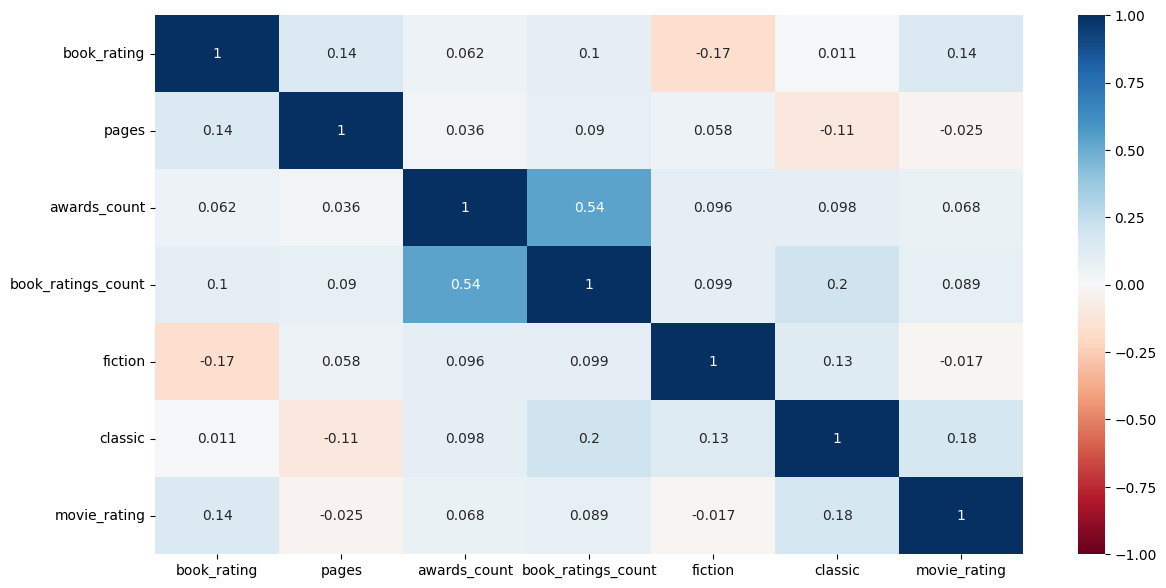

In [14]:
# Creating a correlation matrix
## book_rating/ classic seems most correlated with movie_rating
corr_mat = train.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat,annot=True,vmin=-1,vmax=1,cmap='RdBu');

In [15]:
# Checking for multicollinearity using VIF

vif = pd.DataFrame()
vif['variable'] = adaptations_x.columns
vif['VIF'] = [variance_inflation_factor(adaptations_x.values, i) for i in range(adaptations_x.shape[1])]
print(vif)

## book_rating and pages have VIF over 4 but I will only remove book_rating first

             variable       VIF
0         book_rating  9.586134
1               pages  4.886737
2        awards_count  2.191682
3  book_ratings_count  1.693905
4             fiction  6.490587
5             classic  1.354692


In [16]:
# Re-defining x variables to remove book_rating

adaptations_x2 = adaptations_df[['awards_count', 'pages', 'book_ratings_count', 'fiction', 'classic']]

vif2 = pd.DataFrame()
vif2['variable'] = adaptations_x2.columns
vif2['VIF'] = [variance_inflation_factor(adaptations_x2.values, i) for i in range(adaptations_x2.shape[1])]
print(vif2)

## VIF of all variables are under 4

             variable       VIF
0        awards_count  2.122256
1               pages  3.307156
2  book_ratings_count  1.667054
3             fiction  3.852137
4             classic  1.332336


In [17]:
# Running the base linear regression on training data
x_linear = train[['awards_count', 'pages', 'book_ratings_count', 'fiction', 'classic']]
x_linear_full = sm.add_constant(x_linear)
y_linear = train['movie_rating']

fit = sm.OLS(y_linear, x_linear_full).fit()
print(fit.summary())

## Too many variables have high p-values > 0.05 that removing them makes the model useless

                            OLS Regression Results                            
Dep. Variable:           movie_rating   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     12.08
Date:                Sun, 28 May 2023   Prob (F-statistic):           1.70e-11
Time:                        10:17:37   Log-Likelihood:                -2006.5
No. Observations:                1567   AIC:                             4025.
Df Residuals:                    1561   BIC:                             4057.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5283      0

In [18]:
# Plugging test data into the model
x_linear_test = sm.add_constant(test[['awards_count', 'pages', 'book_ratings_count', 'fiction', 'classic']])
                            
# Using predict method to get predicted values
test["predicted_linear_reg"] = fit.predict(x_linear_test)
test.head()

,book_rating,pages,awards_count,book_ratings_count,fiction,classic,movie_rating,predicted_linear_reg
791,3.57,194,8,39567,1,0,6.5,6.504649
395,3.70,410,1,89496,1,1,7.7,6.784219
518,3.93,281,3,95945,1,0,6.1,6.445169
1591,4.33,512,1,187,1,0,7.1,6.402435
1193,4.41,314,1,3117,0,0,5.6,6.527686


In [19]:
# Measure accuracy by computing OSR2
print(test[['predicted_linear_reg', 'movie_rating']].corr())
test[['movie_rating','predicted_linear_reg']].corr().iloc[0,1]**2

## Evaluation: OSR2 is too small compared to R^2 and many important variables are not statistically significant
## Therefore, I need to figure out another model to use

                      predicted_linear_reg  movie_rating
predicted_linear_reg              1.000000      0.097274
movie_rating                      0.097274      1.000000


0.009462317500398313

## Model 2: Logistic Regression of Movie Rating

In [20]:
# Converting movie_rating to categorical

adaptations_df.loc[adaptations_df['movie_rating'] < 6.5, 'movie_rating_cat'] = 0
adaptations_df.loc[adaptations_df['movie_rating'] >= 6.5, 'movie_rating_cat'] = 1

adaptations_df.head(10)

## Setting the threshold at 6.5 because too many movies make 5

,book_rating,pages,awards_count,book_ratings_count,fiction,classic,movie_rating,movie_rating_cat
0,4.33,374,41,6376780,1,0,7.2,1.0
1,4.50,870,9,2507623,1,1,7.5,1.0
2,4.26,279,1,2998241,1,1,5.1,0.0
3,3.60,501,25,4964519,1,0,6.2,0.0
4,3.60,501,25,4964519,1,0,5.2,0.0
5,4.24,312,1,38683,1,0,6.2,0.0
6,4.24,312,1,38683,1,0,5.2,0.0
7,4.32,320,1,21125,1,0,6.2,0.0
8,4.32,320,1,21125,1,0,5.2,0.0
9,3.94,224,1,2402,1,0,6.2,0.0


In [21]:
# Defining variables
train, test = train_test_split(adaptations_df, test_size = 0.3, random_state = 1)

x_log = train[['awards_count', 'pages', 'book_ratings_count', 'fiction', 'classic']]
y_log = train[['movie_rating_cat']]

In [22]:
#Accuracy of naive rule
print(sum(test['movie_rating_cat']) / test.shape[0])

0.5788690476190477


In [23]:
# Running logistic regression on training data
log = LogisticRegression(penalty="none", solver='lbfgs')
log.fit(x_log, y_log)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='none')

In [24]:
# Make predictions on test data
x_log_test = test[['awards_count', 'pages', 'book_ratings_count', 'fiction', 'classic']]
y_log_pred = log.predict(x_log_test)

In [25]:
# Confusion matrix
y_log_test = test[['movie_rating_cat']]
confusion_matrix(y_log_test,y_log_pred)

array([[  0, 283],
       [  0, 389]])

In [26]:
# Accuracy
accuracy_score(y_log_test, y_log_pred)

0.5788690476190477

In [27]:
# Alternative- using statspackage
x_log_full = sm.add_constant(x_log)
x_log_test_full = sm.add_constant(x_log_test)
log2 = sm.Logit(y_log, x_log_full).fit()
print(log2.params)
print(log2.summary())

Optimization terminated successfully.
         Current function value: 0.675293
         Iterations 5
const                 2.659604e-01
awards_count          1.684800e-02
pages                -4.439051e-04
book_ratings_count    3.611770e-07
fiction              -1.749694e-01
classic               6.747729e-01
dtype: float64
                           Logit Regression Results                           
Dep. Variable:       movie_rating_cat   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1561
Method:                           MLE   Df Model:                            5
Date:                Sun, 28 May 2023   Pseudo R-squ.:                 0.02066
Time:                        10:17:37   Log-Likelihood:                -1058.2
converged:                       True   LL-Null:                       -1080.5
Covariance Type:            nonrobust   LLR p-value:                 1.707e-08
                         coef    std err 

## Predicting

In [28]:
## Classifying a new novel
new_novel = pd.DataFrame([
{'awards_count': 0,
 'pages': 0,
 'book_ratings_count': 0,
 'fiction': 0,
 'classic': 0,
 }
 ])

new_prediction = log.predict(new_novel)

if new_prediction == 1: 
  print ("Your book will be successful.")
else:
  print ("Your book will not be successful.")

## There's no saving this model. It's doomed.

Your book will be successful.
